    Land Stadt  Jahr    Kategorie Merkmal  Zuzüge insgesamt  Zuzüge männlich  \
0  de-sh  Kiel  1987  Bevölkerung  Zuzüge             17325             9524   
1  de-sh  Kiel  1988  Bevölkerung  Zuzüge             17048             9149   
2  de-sh  Kiel  1989  Bevölkerung  Zuzüge             17914             9883   
3  de-sh  Kiel  1990  Bevölkerung  Zuzüge             17491             9525   
4  de-sh  Kiel  1991  Bevölkerung  Zuzüge             14746             8017   

   Zuzüge weiblich  
0             7801  
1             7899  
2             8031  
3             7966  
4             6729  


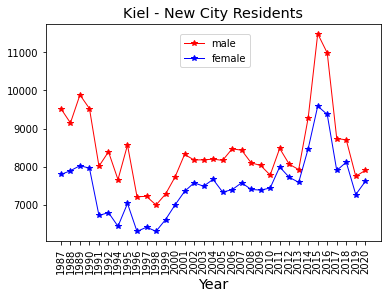

In [2]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_URL = "http://www.kiel.de/opendata/kiel_bevoelkerung_zuzuege.csv"

# fetch csv data
csv_data = requests.get(CSV_URL).content

# create a data frame
df = pd.read_csv(io.StringIO(csv_data.decode("latin1")), sep=";")

# print head (5 rows)
print(df.head())

# create a subplot
fig, ax = plt.subplots()

# drop  not available (na) data
df_cleaned = df.dropna(how="all")

# np.uint16: Unsigned integer (0 to 65535)
df_years = df_cleaned["Jahr"].astype(np.uint16)

x = df_years.values
yw = df_cleaned["Zuzüge weiblich"].values
ym = df_cleaned["Zuzüge männlich"].values

plt.title("Kiel - New City Residents", size="x-large")
plt.ylabel("", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(ym, "*-", markersize=6, linewidth=1, color="r", label="male")
plt.plot(yw, "*-", markersize=6, linewidth=1, color="b", label="female")

plt.legend(loc=(0.4, 0.8))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()